<a href="https://colab.research.google.com/github/Hebbar72/dogs_vs_cats/blob/main/catsvdogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 31.3 MB/s 
     |████████████████████████████████| 59 kB 8.2 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
from fastai.vision.all import *

In [3]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [4]:
!mkdir ~/.kaggle

In [5]:
!rm ~/.kaggle/kaggle.json
!mv kaggle.json ~/.kaggle

rm: cannot remove '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:25<00:00, 20.3MB/s]
100% 812M/812M [00:25<00:00, 34.0MB/s]


In [7]:
!unzip dogs-vs-cats.zip


Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [8]:
!ls

dogs-vs-cats.zip  sample_data  sampleSubmission.csv  test1.zip	train.zip


In [9]:
!unzip test1.zip
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [10]:
import os
from pathlib import Path
import shutil

In [11]:
path1 = Path("./train/")
path2 = Path("./test1/")

In [12]:
#os.listdir(path2)

['11815.jpg',
 '1993.jpg',
 '7520.jpg',
 '8535.jpg',
 '6013.jpg',
 '7799.jpg',
 '4405.jpg',
 '8521.jpg',
 '8346.jpg',
 '12190.jpg',
 '232.jpg',
 '7133.jpg',
 '12455.jpg',
 '2312.jpg',
 '1234.jpg',
 '7885.jpg',
 '1471.jpg',
 '7503.jpg',
 '11053.jpg',
 '8921.jpg',
 '5866.jpg',
 '6824.jpg',
 '8519.jpg',
 '298.jpg',
 '11414.jpg',
 '3750.jpg',
 '9649.jpg',
 '8772.jpg',
 '8691.jpg',
 '5859.jpg',
 '8579.jpg',
 '6117.jpg',
 '787.jpg',
 '11334.jpg',
 '10463.jpg',
 '1223.jpg',
 '11107.jpg',
 '10233.jpg',
 '6995.jpg',
 '5253.jpg',
 '4960.jpg',
 '5432.jpg',
 '8484.jpg',
 '11429.jpg',
 '581.jpg',
 '3053.jpg',
 '9115.jpg',
 '9290.jpg',
 '6135.jpg',
 '7161.jpg',
 '3594.jpg',
 '8283.jpg',
 '9683.jpg',
 '7512.jpg',
 '5999.jpg',
 '10170.jpg',
 '1581.jpg',
 '4897.jpg',
 '127.jpg',
 '3180.jpg',
 '11337.jpg',
 '608.jpg',
 '6818.jpg',
 '5284.jpg',
 '4211.jpg',
 '2581.jpg',
 '1074.jpg',
 '6698.jpg',
 '971.jpg',
 '6971.jpg',
 '2491.jpg',
 '441.jpg',
 '5136.jpg',
 '7745.jpg',
 '2456.jpg',
 '1035.jpg',
 '5593.j

In [13]:
from PIL import Image
for i in os.listdir(path1):
  img = Image.open(path1/i)
  img = img.resize((300,300))
  img.save(path1/i)


In [14]:
dls = ImageDataLoaders.from_name_re(path1, get_image_files(path1), pat = r'^(.*)\.\d+.jpg', item_tfms = Resize(300))

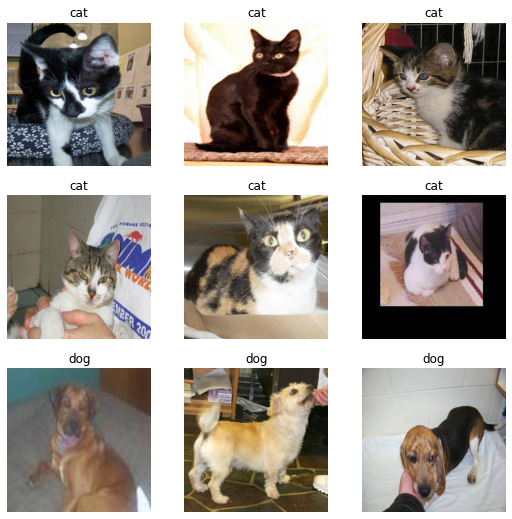

In [15]:
dls.show_batch()

In [16]:
learner =cnn_learner(dls, resnet34, metrics = accuracy)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0003981071640737355)

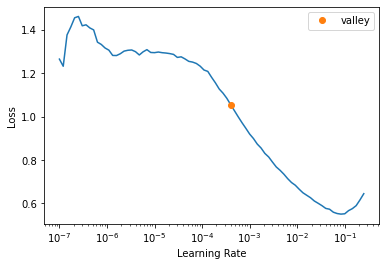

In [17]:
learner.lr_find()

In [18]:
#history = learner.fine_tune(10, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.069959,0.041750,0.986200,02:44


epoch,train_loss,valid_loss,accuracy,time
0,0.034281,0.024824,0.990600,03:42
1,0.035080,0.028920,0.989800,03:43
2,0.049327,0.075107,0.973400,03:43
3,0.029985,0.035189,0.989200,03:43
4,0.015220,0.032176,0.988800,03:44
5,0.008782,0.038418,0.990000,03:44
6,0.008189,0.038400,0.989800,03:43
7,0.001765,0.035734,0.990400,03:46
8,0.000743,0.035906,0.992000,03:44
9,0.000341,0.036173,0.992000,03:43


In [19]:
from fastai.vision.widgets import *
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

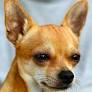

In [21]:
img = PILImage.create(btn_upload.data[0])
img


In [22]:
pred = learner.predict(img)
pred

('dog', TensorBase(1), TensorBase([2.4013e-07, 1.0000e+00]))

In [23]:
learner.export()

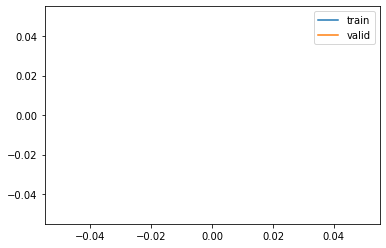

In [25]:
learner.recorder.plot_loss()

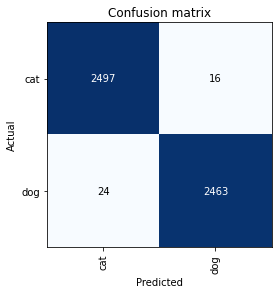

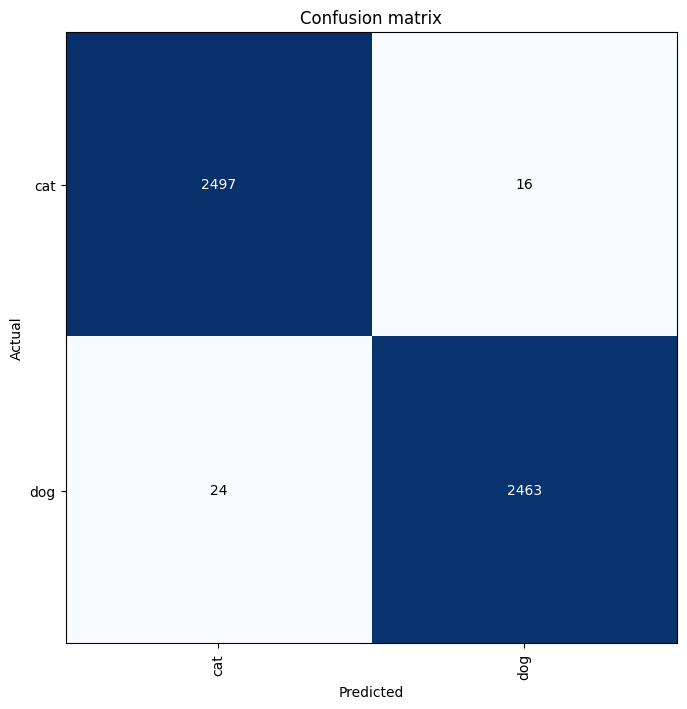

In [26]:
interpret = ClassificationInterpretation.from_learner(learner)
losses,idxs = interpret.top_losses()


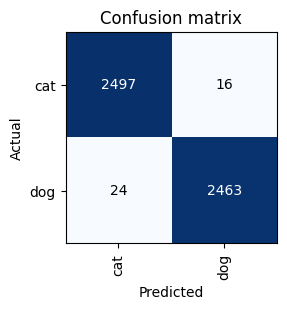

In [31]:
interpret.plot_confusion_matrix(normalize = False, figsize=(3, 3), dpi=100)

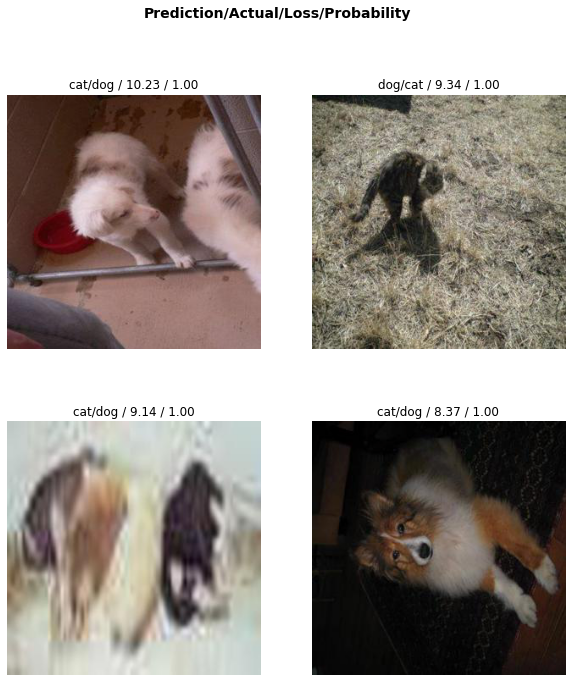

In [32]:
interpret.plot_top_losses(10, figsize=(10,11))

In [33]:
!ls

dogs-vs-cats.zip  sampleSubmission.csv	test1.zip  train.zip
sample_data	  test1			train


In [36]:
!cd train;ls

cat.0.jpg      cat.3251.jpg  cat.7753.jpg   dog.12253.jpg  dog.5504.jpg
cat.10000.jpg  cat.3252.jpg  cat.7754.jpg   dog.12254.jpg  dog.5505.jpg
cat.10001.jpg  cat.3253.jpg  cat.7755.jpg   dog.12255.jpg  dog.5506.jpg
cat.10002.jpg  cat.3254.jpg  cat.7756.jpg   dog.12256.jpg  dog.5507.jpg
cat.10003.jpg  cat.3255.jpg  cat.7757.jpg   dog.12257.jpg  dog.5508.jpg
cat.10004.jpg  cat.3256.jpg  cat.7758.jpg   dog.12258.jpg  dog.5509.jpg
cat.10005.jpg  cat.3257.jpg  cat.7759.jpg   dog.12259.jpg  dog.550.jpg
cat.10006.jpg  cat.3258.jpg  cat.775.jpg    dog.1225.jpg   dog.5510.jpg
cat.10007.jpg  cat.3259.jpg  cat.7760.jpg   dog.12260.jpg  dog.5511.jpg
cat.10008.jpg  cat.325.jpg   cat.7761.jpg   dog.12261.jpg  dog.5512.jpg
cat.10009.jpg  cat.3260.jpg  cat.7762.jpg   dog.12262.jpg  dog.5513.jpg
cat.1000.jpg   cat.3261.jpg  cat.7763.jpg   dog.12263.jpg  dog.5514.jpg
cat.10010.jpg  cat.3262.jpg  cat.7764.jpg   dog.12264.jpg  dog.5515.jpg
cat.10011.jpg  cat.3263.jpg  cat.7765.jpg   dog.12265.jpg  dog.55

In [37]:
!mv train/export.pkl .

In [38]:
!ls


dogs-vs-cats.zip  sample_data		test1	   train
export.pkl	  sampleSubmission.csv	test1.zip  train.zip
